<center> <h1>[INFO-F305] - Modélisation et Simulation - Projet Octave<br><br>Alexandre HENEFFE<br>Ricardo GOMES RODRIGUES<br><br>Novembre 2018</h1> </center>


# Introduction
Dans le cadre de ce projet, nous sommes amenés à étudier et analyser l'évolution de systèmes dynamiques modélisant l'évolution des sentiments de deux robots w(t) (WALL-E) et e(t) (EVE). La formule suivante représente l'évolution général de leur sentiments.
$$
    \dot{R} = AR \rightarrow{} \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & a_{11}w(t) + a_{12}e(t) \\
      \dot{e}(t)  & = & a_{21}w(t) + a_{22}e(t)
   \end{array}
   \right .
$$
Nous aurons l'occasion d'étudier plusieurs cas de figures de cette formule.

# Typologie des systèmes

## Cas 1


Les sentiments d'EVE ne dépendent pas de WALL-E

$$
    \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & aw(t) + be(t) \\
      \dot{e}(t)  & = & 0
   \end{array}
   \right .
$$

$$
\begin{bmatrix}
a & b \\
0 & 0
\end{bmatrix}
$$

#### Valeurs propres

$$ \lambda_{1,2} = \frac{a \pm \sqrt{a^2}}{2} = \{a, 0\}$$ 
Donc ce sera toujours un système non simple stable/instable.

#### Déterminant

det(A) = 0 : système non simple : infinité de points d'équilibre


## Cas 2


Les deux automates ont la même dynamique

$$
    \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & aw(t) + be(t) \\
      \dot{e}(t)  & = & bw(t) + ae(t)
   \end{array}
   \right .
$$

$$
\begin{bmatrix}
a & b \\
b & a
\end{bmatrix}
$$

#### Valeurs propres
$ \lambda_{1,2} = \frac{2a \pm \sqrt{4a^2 - 4(-b^2+a^2)}}{2} = a \pm b$ 


* Nous aurons toujours des $\lambda_{1,2}$ réels.
* Si a = 0, $\lambda_{1, 2} = \pm b$ et donc un système non simple instable/stable
* Si b = 0, $\lambda_{1,2} $ de signes opposés et donc une selle
* Si a = b, $\lambda_{1}$ et/ou $\lambda_{2}$ = 0 et donc nous aurons un système non simple instable/stable.
* Sinon, il peut prendre les autres types possibles (noeud instable, noeud stable, etc..)


#### Déterminant

Det(A) = $a^2 - b^2$

* Si a = b, le déterminant est égal à 0 et nous avons un système simple avec un point d'équilibre en (0,0)
* Sinon, le déterminant est différent de 0 et nous avons un système non-simple avec plusieurs points d'équilibre.

## Cas 3
Les deux robots ont une dynamique contrastante

$$
    \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & aw(t) + be(t) \\
      \dot{e}(t)  & = & -bw(t) + -ae(t)
   \end{array}
   \right .
$$

$$
\begin{bmatrix}
a & b \\
-b & -a
\end{bmatrix}
$$

#### Valeurs propres
$$ \lambda_{1,2} = \frac{0 \pm \sqrt{-4(-a^2+b^2}}{2} = \pm \sqrt{-a^2-b^2}$$

* Si $|b| > |a|$, on a des racines complexes dont le $\alpha = 0$ et donc nous aurons toujours un centre.
* Si $|a| == |b|$, alors nous avons $\lambda_{1,2} = 0$ et nous aurons un système non simple instable.
* Sinon, $|b| < |a|$ et nous aurons $\lambda_{1,2} \in \mathbb{R}$ et le système peut être un des autres types possibles (noeud instable, ...).


#### Déterminant

det(A) = $-a^2 + b^2$

* Si a == b, det(A) = 0 et donc ce sera un système simple et nous aurons un point d'équilibre en (0,0)
* Sinon, det(A) sera différent de 0 et on aura un système non-simple ainsi que plusieurs points d'équilibre.




## Cas 4

La dynamique de chaque robot dépend simplement du robot-même

$$
    \left \{
   \begin{array}{r c l}
      \dot{w}(t)  & = & ae(t) \\
      \dot{e}(t)  & = & bw(t)
   \end{array}
   \right .
$$

$$
\begin{bmatrix}
0 & a \\
b & 0
\end{bmatrix}
$$

#### Valeurs propres
$$ \lambda_{1,2} = \frac{0 \pm \sqrt{-4(-ab)}}{2} = \pm \sqrt{ab} $$ 
* Si a = 0 ou b = 0: $\lambda_{1,2} = 0$ \\
* Si a et b sont de signes opposés : $\lambda_{1,2}$ = complexes conjugués et du coup soit un centre, soit un foyer stable, soit un foyer instable\\
* Si a et b sont de signes égaux : $\lambda_{1}$ et $\lambda_{2}$ de signes opposés et du coup une selle.



#### Déterminant

Det(A) = -ab

* Si a = 0 ou b = 0, Det(A) = 0 et nous avons un système simple et un seul point d'équilibre (0,0)
* Sinon, nous avons un système non simple et plusieurs points d'équilibre.

# Droites invariantes, isoclines, portraits de phase
Après avoir analysé paramétriquement les différents systèmes, nous calculons les droites invariantes et isoclines résultantes que nous synthétisons dans un portrait de phase.

## Systèmes
Ci-dessous, nous avons la représentation du système dynamique d'ordre 2 général. Nous pouvons choisir les conditions initiales associées.

In [3]:
# 1. Représentation du système dynamique d'ordre 2.
function [t,x] = system_simulation(A, init)
    ode_sys = @(t,x) [A(1,1)*x(1)+A(1,2)*x(2);A(2,1)*x(1)+A(2,2)*x(2)]; # Définition du système
    [t,x] = ode23 (ode_sys, [0, 10], init); # Résolution du système
endfunction

## Droites invariantes
Ci-dessous, nous avons les calculs des droites invariantes: vecteurs propres et leurs trajectoires associées.

In [4]:
# 2. Dessiner les droites correspondants aux vecteurs propres et le sense des trajectoires associés
function [eigenline_1,eigenline_2,V] = compute_eigenlines(A,line_range)
    [V,L] = eig(A);
    eigenline_1 = (V(2,1)/V(1,1)) * line_range;
    eigenline_2 = (V(2,2)/V(1,2)) * line_range;
endfunction

## Isoclines
Ci-dessous, nous avons les calculs des isoclines.

In [5]:
# 3. Calculer les isoclines
function [isocline_1,isocline_2] = compute_isoclines(A,line_range)
    isocline_1 = -(A(1,1)/A(1,2)) * line_range;
    isocline_2 = -(A(2,1)/A(2,2)) * line_range;
endfunction

## Portrait de phase
Ci-dessous, nous avons le portrait de phase complet qui contient les droites invariantes, les isoclines et le portrait de phase.

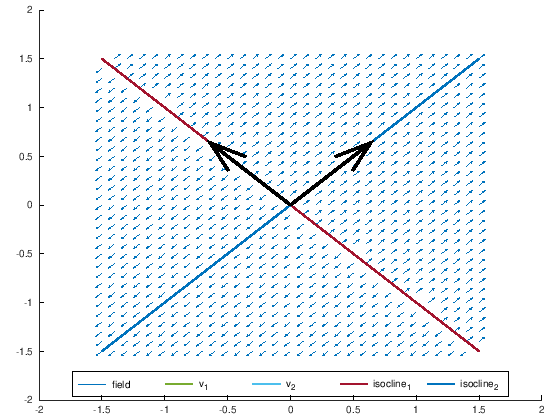

In [6]:
# 4. Portrait de phase complet
function [x1,x2,x1p,x2p] = plot_portrait_phase_complete(A)
    #grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);

    # Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    norms=sqrt(x1p.^2+x2p.^2);
    
    figure(2)
    [eigenline_1,eigenline_2,V] = compute_eigenlines(A,x1range);
    [isocline_1,isocline_2] = compute_isoclines(A,x1range);
    
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./norms,x2p./norms,0.5);
    # Isoclines
    plot(x1range,isocline_1,"linewidth",5);
    plot(x1range,isocline_2,"linewidth",5);
    # Vecteurs propres
    plot(x1range,eigenline_1,"linewidth",5);
    plot(x1range,eigenline_2,"linewidth",5);
    quiver([0;0],[0;0],V(1,:),V(2,:),"linewidth",10,"color","k");
    legend("field","v_1","v_2","isocline_1","isocline_2","location","south","orientation", "horizontal");
    
endfunction

A = [1 1;1 1];
[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);